MACHINE LEARNING IN R

In [34]:
# Assignment 5 – Machine Learning in R

#Author: Kate Zoller  
#Date: 07/24/2025 
#Environment: See `assignment5_R' 
#Description: This notebook explores basic machine learning using ggplot2, caret, tidyverse, including data preparation, model training, and evaluation.

2. Load the Data

In [35]:
# define the filename
filename <- "iris(1).csv"
# load the CSV file from the local directory
dataset <- read.csv(filename, header=FALSE)
# set the column names in the dataset
colnames(dataset) <- c("Sepal.Length","Sepal.Width","Petal.Length","Petal.Width","Species")

In [36]:
library(caret)

In [37]:
# create a validation dataset 

# create a list of 80% of the rows in the original dataset we can use for training
validation_index <- createDataPartition(dataset$Species, p=0.80, list=FALSE)
# select 20% of the data for validation
validation <- dataset[-validation_index,]
# use the remaining 80% of data to training and testing the models
dataset <- dataset[validation_index,]

3. Summarize Dataset

In [38]:
# dimensions of dataset
dim(dataset)

[1] 120   5

In [39]:
# list types for each attribute
sapply(dataset, class)

Sepal.Length  Sepal.Width Petal.Length  Petal.Width      Species 
   "numeric"    "numeric"    "numeric"    "numeric"  "character"

In [40]:
# peek at first 5 rows of data set 
head(dataset)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa
8,5.0,3.4,1.5,0.2,Iris-setosa


In [41]:
dataset$Species <- as.factor(dataset$Species)

In [42]:
# list the levels for the class
levels(dataset$Species)

[1] "Iris-setosa"     "Iris-versicolor" "Iris-virginica"

In [43]:
# summarize the class distribution
percentage <- prop.table(table(dataset$Species)) * 100
cbind(freq=table(dataset$Species), percentage=percentage)

,freq,percentage
Iris-setosa,40,33.33333
Iris-versicolor,40,33.33333
Iris-virginica,40,33.33333


In [44]:
# summarize attribute distributions
summary(dataset)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width  
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.10  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.30  
 Median :5.800   Median :3.000   Median :4.200   Median :1.30  
 Mean   :5.837   Mean   :3.048   Mean   :3.757   Mean   :1.19  
 3rd Qu.:6.425   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.80  
 Max.   :7.900   Max.   :4.400   Max.   :6.700   Max.   :2.50  
            Species  
 Iris-setosa    :40  
 Iris-versicolor:40  
 Iris-virginica :40  
                     
                     
                     

Visualize Dataset

In [45]:
#univariate plots 
# split input and output
x <- dataset[,1:4]
y <- dataset[,5]

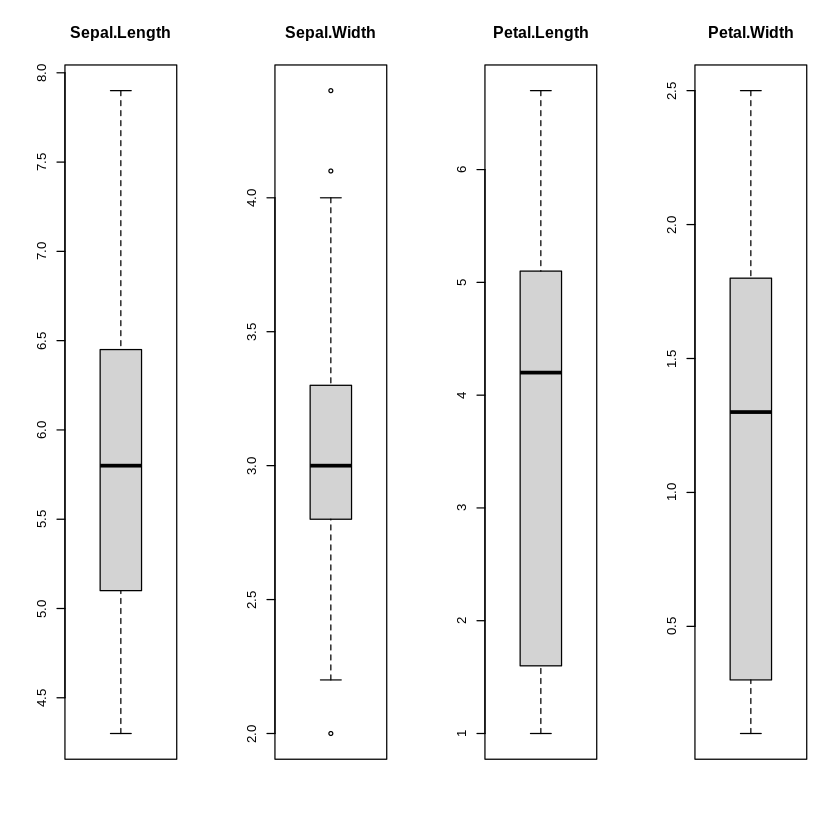

In [46]:
# boxplot for each attribute on one image
par(mfrow=c(1,4))
  for(i in 1:4) {
  boxplot(x[,i], main=names(iris)[i])
}

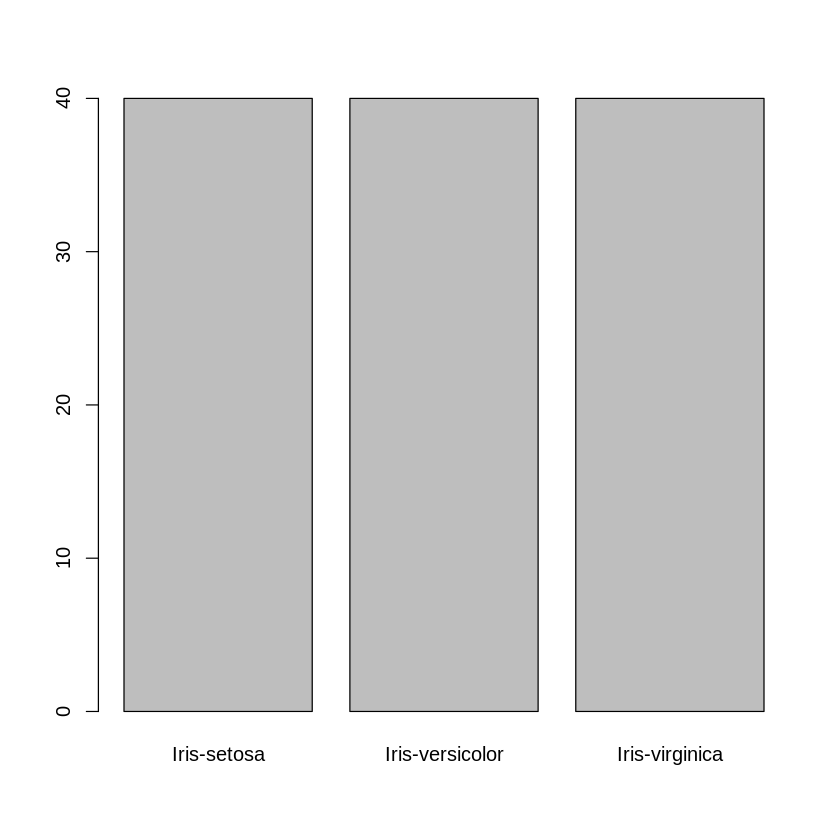

In [47]:
# barplot for class breakdown
plot(y)

In [48]:
library(ellipse)

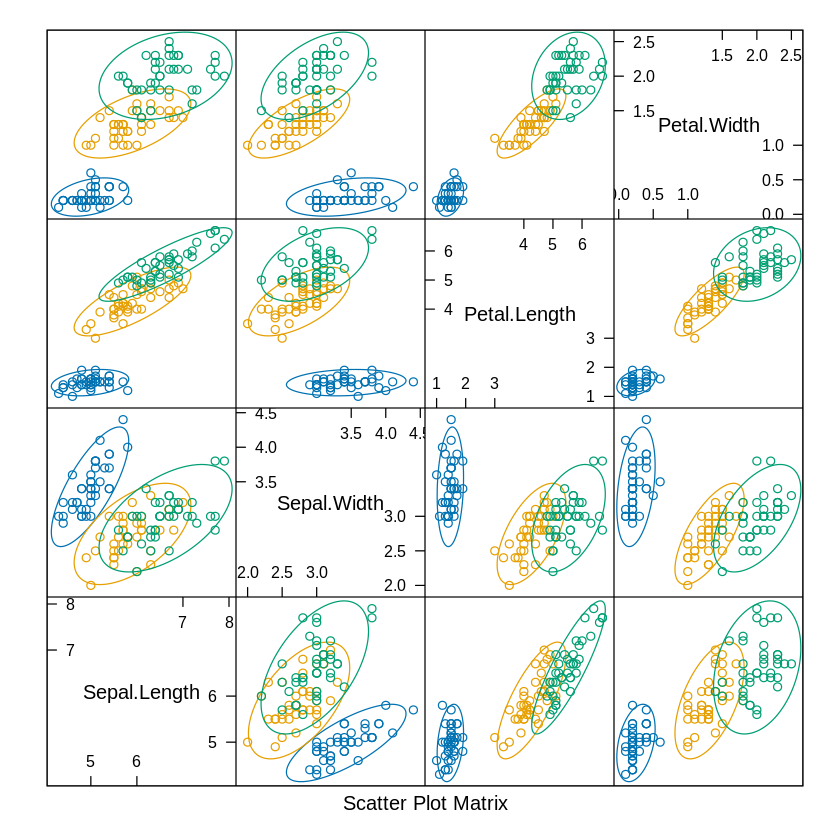

In [49]:
# multivariate plots 
# scatterplot matrix
featurePlot(x=x, y=y, plot="ellipse")

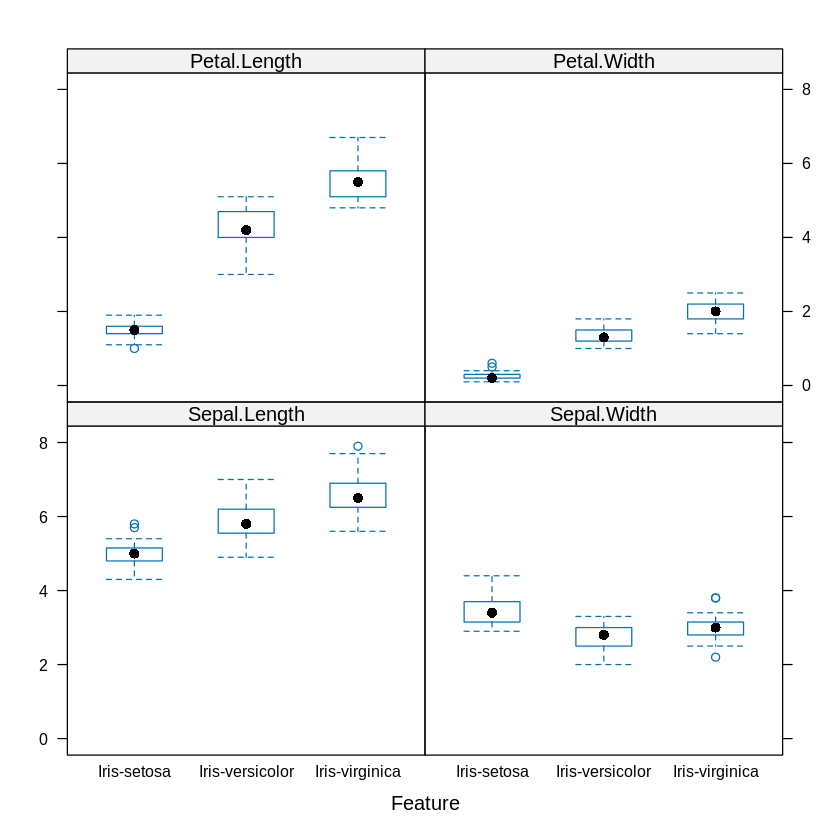

In [50]:
# box and whisker plots for each attribute
featurePlot(x=x, y=y, plot="box")

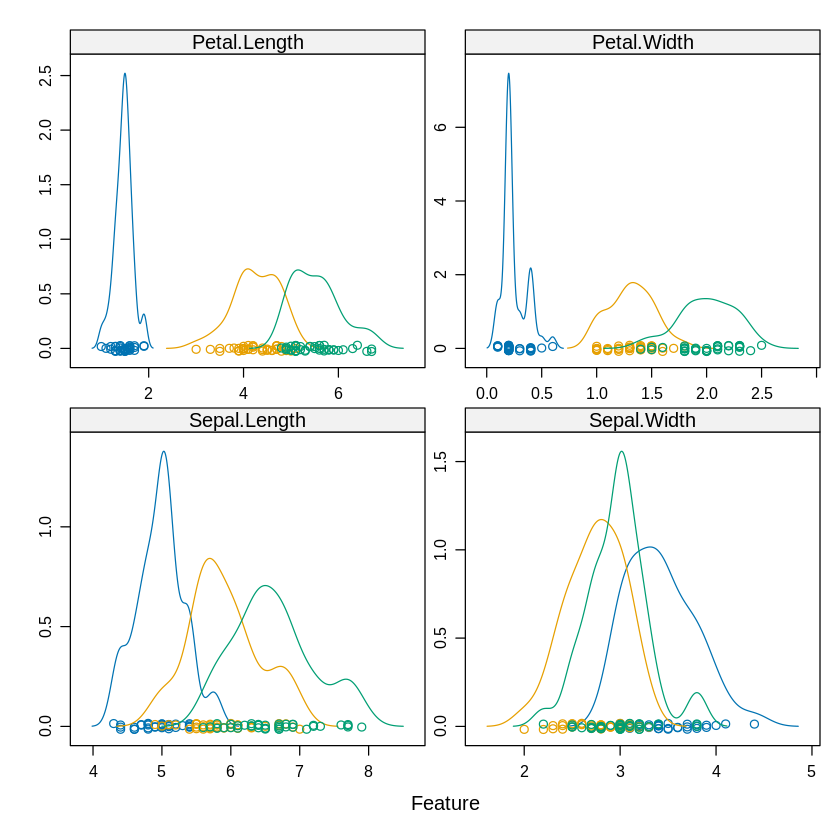

In [51]:
# density plots for each attribute by class value
scales <- list(x=list(relation="free"), y=list(relation="free"))
featurePlot(x=x, y=y, plot="density", scales=scales)

5. Evaluate Algorithms

In [52]:
# Run algorithms using 10-fold cross validation
control <- trainControl(method="cv", number=10)
metric <- "Accuracy"

In [54]:
# a) linear algorithms
set.seed(7)
fit.lda <- train(Species~., data=dataset, method="lda", metric=metric, trControl=control)
# b) nonlinear algorithms
# CART
set.seed(7)
fit.cart <- train(Species~., data=dataset, method="rpart", metric=metric, trControl=control)
# kNN
set.seed(7)
fit.knn <- train(Species~., data=dataset, method="knn", metric=metric, trControl=control)
# c) advanced algorithms
# SVM
set.seed(7)
fit.svm <- train(Species~., data=dataset, method="svmRadial", metric=metric, trControl=control)
# Random Forest
set.seed(7)
fit.rf <- train(Species~., data=dataset, method="rf", metric=metric, trControl=control)

In [55]:
# summarize accuracy of models
results <- resamples(list(lda=fit.lda, cart=fit.cart, knn=fit.knn, svm=fit.svm, rf=fit.rf))
summary(results)


Call:
summary.resamples(object = results)

Models: lda, cart, knn, svm, rf 
Number of resamples: 10 

Accuracy 
          Min.   1st Qu.    Median      Mean   3rd Qu. Max. NA's
lda  0.8333333 1.0000000 1.0000000 0.9750000 1.0000000    1    0
cart 0.8333333 0.8541667 0.9166667 0.9166667 0.9791667    1    0
knn  0.8333333 0.9375000 1.0000000 0.9666667 1.0000000    1    0
svm  0.8333333 0.9166667 0.9583333 0.9500000 1.0000000    1    0
rf   0.8333333 0.9166667 1.0000000 0.9500000 1.0000000    1    0

Kappa 
     Min. 1st Qu. Median   Mean 3rd Qu. Max. NA's
lda  0.75 1.00000 1.0000 0.9625 1.00000    1    0
cart 0.75 0.78125 0.8750 0.8750 0.96875    1    0
knn  0.75 0.90625 1.0000 0.9500 1.00000    1    0
svm  0.75 0.87500 0.9375 0.9250 1.00000    1    0
rf   0.75 0.87500 1.0000 0.9250 1.00000    1    0


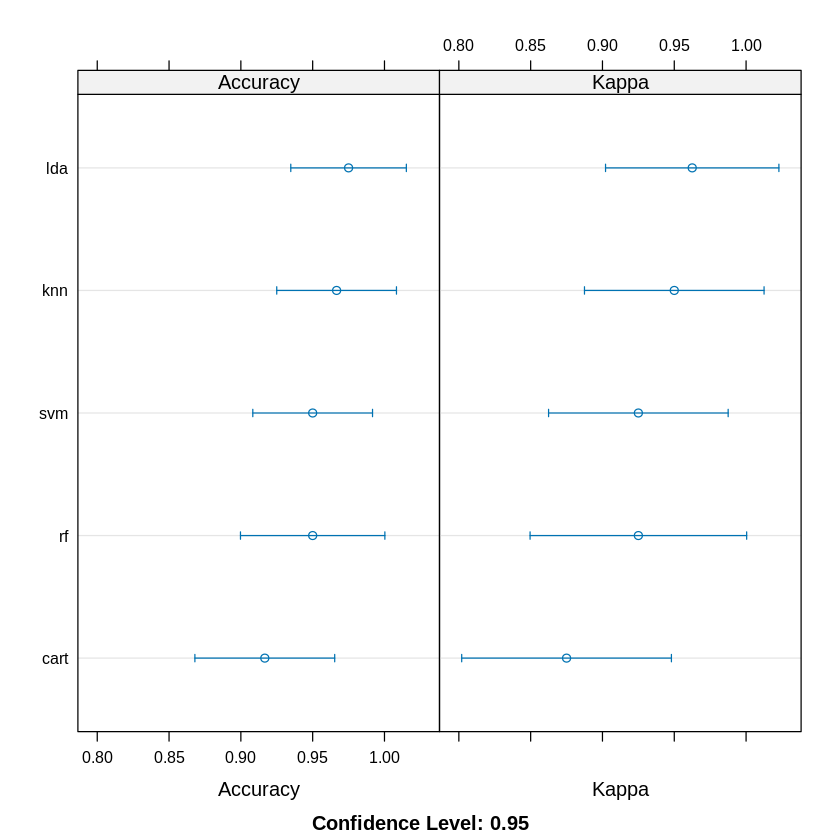

In [56]:
# compare accuracy of models
dotplot(results)

In [61]:
# summarize Best Model
print(fit.lda)

Linear Discriminant Analysis 

120 samples
  4 predictor
  3 classes: 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 108, 108, 108, 108, 108, 108, ... 
Resampling results:

  Accuracy  Kappa 
  0.975     0.9625



In [64]:
# Ensure both are factors with the same levels
predictions <- factor(predictions, levels = levels(dataset$Species))
reference <- factor(validation$Species, levels = levels(dataset$Species))

# Now run confusion matrix
confusionMatrix(predictions, reference)

Confusion Matrix and Statistics

                 Reference
Prediction        Iris-setosa Iris-versicolor Iris-virginica
  Iris-setosa              10               0              0
  Iris-versicolor           0              10              0
  Iris-virginica            0               0             10

Overall Statistics
                                     
               Accuracy : 1          
                 95% CI : (0.8843, 1)
    No Information Rate : 0.3333     
    P-Value [Acc > NIR] : 4.857e-15  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: Iris-setosa Class: Iris-versicolor
Sensitivity                      1.0000                 1.0000
Specificity                      1.0000                 1.0000
Pos Pred Value                   1.0000                 1.0000
Neg Pred Value                   1.0000                 1.0

In [67]:
# estimate skill of LDA on the validation dataset
validation$Species<-factor(validation$Species)
predictions<-factor(predictions, levels=levels(validation$Species))
confusionMatrix(predictions,validation$Species)

Confusion Matrix and Statistics

                 Reference
Prediction        Iris-setosa Iris-versicolor Iris-virginica
  Iris-setosa              10               0              0
  Iris-versicolor           0              10              0
  Iris-virginica            0               0             10

Overall Statistics
                                     
               Accuracy : 1          
                 95% CI : (0.8843, 1)
    No Information Rate : 0.3333     
    P-Value [Acc > NIR] : 4.857e-15  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: Iris-setosa Class: Iris-versicolor
Sensitivity                      1.0000                 1.0000
Specificity                      1.0000                 1.0000
Pos Pred Value                   1.0000                 1.0000
Neg Pred Value                   1.0000                 1.0